## Prediction of housing prices- Linear Regression

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('USA_Housing.csv')

In [3]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [5]:
df.columns

Index([u'Avg. Area Income', u'Avg. Area House Age',
       u'Avg. Area Number of Rooms', u'Avg. Area Number of Bedrooms',
       u'Area Population', u'Price', u'Address'],
      dtype='object')

In [9]:
X = df[['Avg. Area Income', 'Avg. Area House Age',
       'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms',
       'Area Population']]

In [7]:
y = df['Price']

In [8]:
from sklearn.cross_validation import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lm = LinearRegression() 

In [13]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
print(lm.intercept_)

-2640159.79685


In [17]:
print(lm.coef_)

[  2.15282755e+01   1.64883282e+05   1.22368678e+05   2.23380186e+03
   1.51504200e+01]


In [18]:
X_train.columns

Index([u'Avg. Area Income', u'Avg. Area House Age',
       u'Avg. Area Number of Rooms', u'Avg. Area Number of Bedrooms',
       u'Area Population'],
      dtype='object')

In [19]:
cdf = pd.DataFrame(lm.coef_, X.columns,columns=['Coeff'])

In [20]:
cdf.head()

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


## Prediction

In [26]:
predictions = lm.predict(X_test)

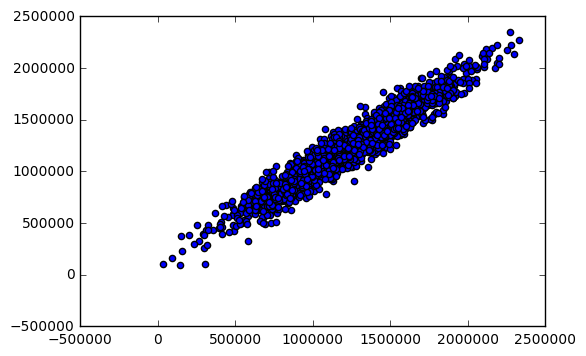

In [31]:
plt.scatter(y_test,predictions)

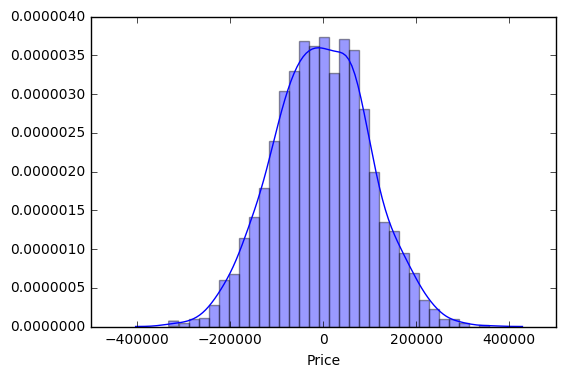

In [32]:
sns.distplot((y_test - predictions))

In [34]:
from sklearn import metrics

In [35]:
metrics.mean_absolute_error(y_test,predictions)

82288.222519149509

In [36]:
metrics.mean_squared_error(y_test, predictions)

10460958907.208992

In [37]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

102278.82922290904